MNIST is a supervised Classification. COnverting it to unsupervised with t-SNE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data =datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixelVals, targets=data
targets=targets.astype(int)

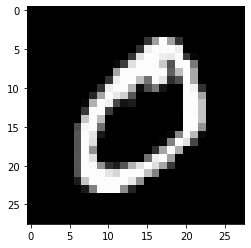

In [3]:
single_img=pixelVals[1,:].reshape(28,28);
plt.imshow(single_img, cmap="gray")

In [8]:
tsne=manifold.TSNE(n_components=2, random_state=42)
transformed_data=tsne.fit_transform(pixelVals[:3000,:])

In [9]:
tsne_df=pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),columns=["X","Y","Targets"])
tsne_df.loc[:,"Targets"]=tsne_df.Targets.astype(int)

In [10]:
tsne_df.head()

,X,Y,Targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


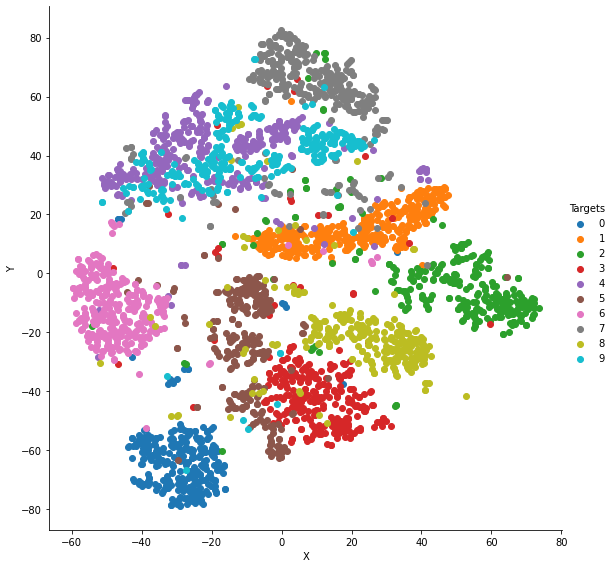

In [12]:
grid=sns.FacetGrid(tsne_df,hue="Targets",size=8);
grid.map(plt.scatter,"X","Y").add_legend()